In [249]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [250]:
Data = loadtxt('Dataset',delimiter=',')


In [251]:
X = Data[:,0:8]
Y = Data[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [252]:
Attributes  =  ['No of times Pregnant','plasma glucose concentration','Diastolic blood pressure','Triceps skin fold thickness','2-Hour serum insulin','BMI','Diabetes pedigree function','Age']
Output = ['Class']


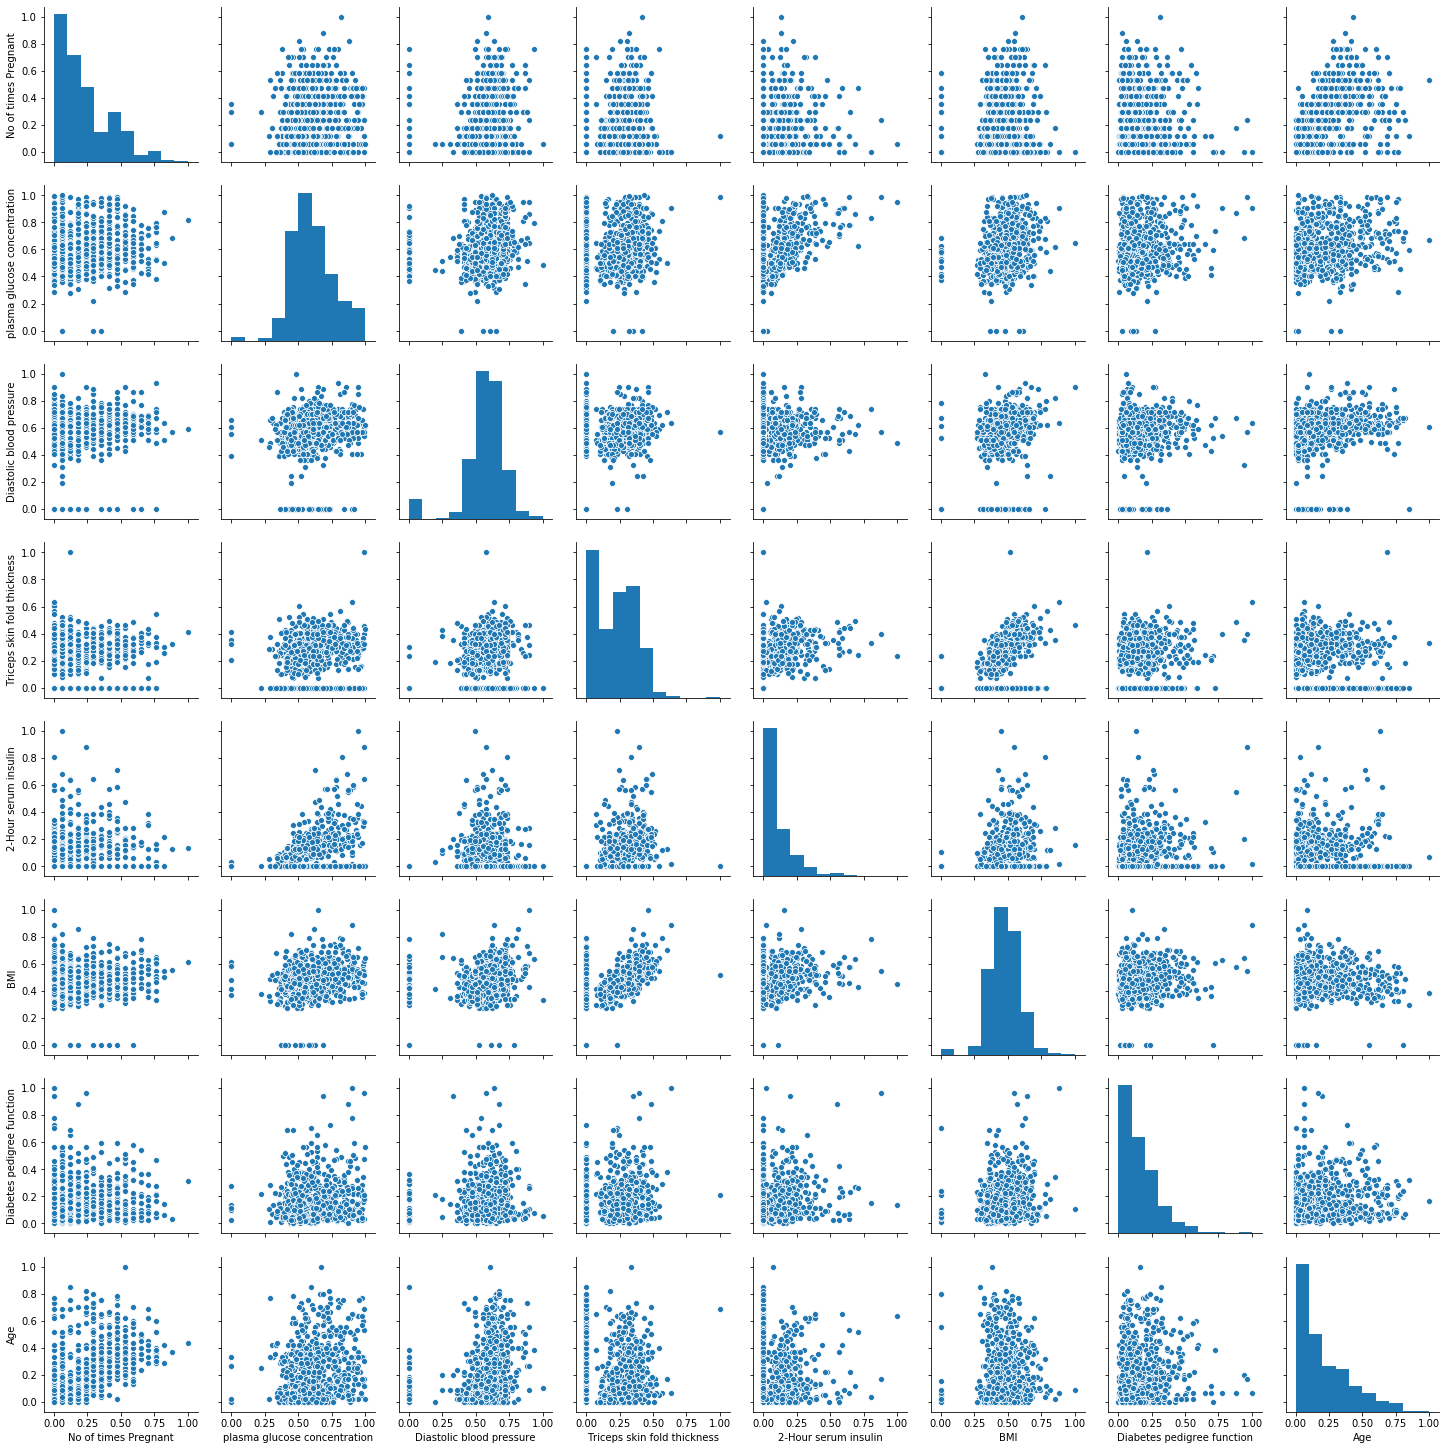

In [253]:
X_pd = pd.DataFrame(X,columns = Attributes)
minmax_scaler = preprocessing.MinMaxScaler()
X_pd[Attributes] = minmax_scaler.fit_transform(X_pd[Attributes])
X_pd.describe()

sns.pairplot(X_pd)

In [254]:
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_pd, Y, test_size=0.20, random_state=42)
X_pd.head()

,No of times Pregnant,plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


,No of times Pregnant,plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age
No of times Pregnant,1.000000,0.142507,0.157544,-0.070691,-0.066401,0.027197,-0.018944,0.553048
plasma glucose concentration,0.142507,1.000000,0.158320,0.017320,0.337064,0.205162,0.141597,0.270740
Diastolic blood pressure,0.157544,0.158320,1.000000,0.178062,0.085834,0.250012,0.044826,0.239588
Triceps skin fold thickness,-0.070691,0.017320,0.178062,1.000000,0.437564,0.386223,0.174623,-0.149863
2-Hour serum insulin,-0.066401,0.337064,0.085834,0.437564,1.000000,0.196035,0.158923,-0.043823
BMI,0.027197,0.205162,0.250012,0.386223,0.196035,1.000000,0.131945,0.004453
Diabetes pedigree function,-0.018944,0.141597,0.044826,0.174623,0.158923,0.131945,1.000000,0.020052
Age,0.553048,0.270740,0.239588,-0.149863,-0.043823,0.004453,0.020052,1.000000


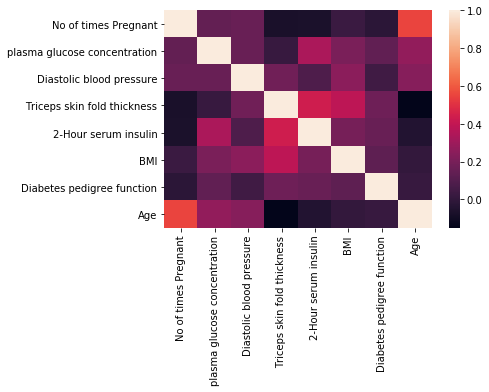

In [255]:
corrmat = X_train_scaled.corr()
sns.heatmap(corrmat)
corrmat

,No of times Pregnant,plasma glucose concentration,Triceps skin fold thickness,2-Hour serum insulin,BMI,Age
No of times Pregnant,1.000000,0.142507,-0.070691,-0.066401,0.027197,0.553048
plasma glucose concentration,0.142507,1.000000,0.017320,0.337064,0.205162,0.270740
Triceps skin fold thickness,-0.070691,0.017320,1.000000,0.437564,0.386223,-0.149863
2-Hour serum insulin,-0.066401,0.337064,0.437564,1.000000,0.196035,-0.043823
BMI,0.027197,0.205162,0.386223,0.196035,1.000000,0.004453
Age,0.553048,0.270740,-0.149863,-0.043823,0.004453,1.000000


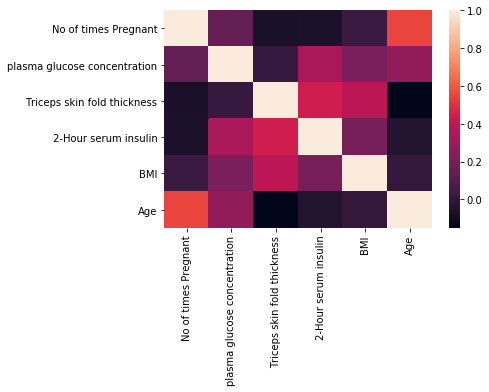

In [256]:
# drop non influential attributes

X_pd = X_pd.drop(['Diastolic blood pressure','Diabetes pedigree function'],axis = 1)
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_pd, Y, test_size=0.20, random_state=42)
corrmat = X_train_scaled.corr()
sns.heatmap(corrmat)
corrmat

In [257]:
model = Sequential();
model.add(Dense(12,input_dim = 6,activation = 'relu'))  # input and 1st layer
model.add(Dense(12,activation = 'relu')) #2nd layer
model.add(Dense(1,activation = 'sigmoid')) # output layer

# after defining the model we need to compile it.

In [258]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

Epoch 1/200
614/614 [==============================] - 1s 1ms/step - loss: 0.6876 - accuracy: 0.6173
Epoch 2/200
614/614 [==============================] - 0s 108us/step - loss: 0.6788 - accuracy: 0.6531
Epoch 3/200
614/614 [==============================] - 0s 105us/step - loss: 0.6722 - accuracy: 0.6531
Epoch 4/200
614/614 [==============================] - 0s 102us/step - loss: 0.6670 - accuracy: 0.6531
Epoch 5/200
614/614 [==============================] - 0s 108us/step - loss: 0.6620 - accuracy: 0.6531
Epoch 6/200
614/614 [==============================] - 0s 108us/step - loss: 0.6576 - accuracy: 0.6531
Epoch 7/200
614/614 [==============================] - 0s 108us/step - loss: 0.6544 - accuracy: 0.6531
Epoch 8/200
614/614 [==============================] - 0s 107us/step - loss: 0.6522 - accuracy: 0.6531
Epoch 9/200
614/614 [==============================] - 0s 103us/step - loss: 0.6507 - accuracy: 0.6531
Epoch 10/200
614/614 [==============================] - 0s 104us/step - los

Epoch 80/200
614/614 [==============================] - 0s 104us/step - loss: 0.4573 - accuracy: 0.7720
Epoch 81/200
614/614 [==============================] - 0s 96us/step - loss: 0.4577 - accuracy: 0.7736
Epoch 82/200
614/614 [==============================] - 0s 97us/step - loss: 0.4603 - accuracy: 0.7590
Epoch 83/200
614/614 [==============================] - 0s 97us/step - loss: 0.4595 - accuracy: 0.7785
Epoch 84/200
614/614 [==============================] - 0s 105us/step - loss: 0.4549 - accuracy: 0.7704
Epoch 85/200
614/614 [==============================] - 0s 104us/step - loss: 0.4566 - accuracy: 0.7720
Epoch 86/200
614/614 [==============================] - 0s 101us/step - loss: 0.4543 - accuracy: 0.7752
Epoch 87/200
614/614 [==============================] - 0s 90us/step - loss: 0.4541 - accuracy: 0.7720
Epoch 88/200
614/614 [==============================] - 0s 99us/step - loss: 0.4542 - accuracy: 0.7736
Epoch 89/200
614/614 [==============================] - 0s 108us/step

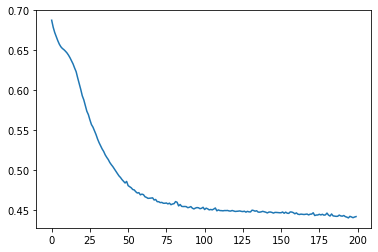

In [259]:
history = model.fit(X_train_scaled,Y_train,epochs = 200,batch_size = 32)
plt.plot(history.history['loss'])

In [260]:
_,accuracy = model.evaluate(X_train_scaled,Y_train)
print('Accuracy :',(100*accuracy))

614/614 [==============================] - 0s 367us/step
Accuracy : 78.33876013755798


In [261]:
predictions = model.predict(X_train_scaled);
pred = [round(x[0]) for x in predictions] 

In [262]:
tn, fp, fn, tp = confusion_matrix(Y_train,pred).ravel()

In [263]:
print('True Neg:',tn)
print('False Pos:',fp)
print('False Neg:',fn)
print('True Pos:',tp)

True Neg: 345
False Pos: 56
False Neg: 77
True Pos: 136


In [264]:
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
F1 = 2*(Precision*Recall)/(Precision + Recall)

print('Precision:',Precision)
print('Recall:', Recall)
print('F1 Score:',F1)

Precision: 0.7083333333333334
Recall: 0.6384976525821596
F1 Score: 0.671604938271605


In [265]:
precision_recall_fscore_support(Y_train, pred,average = 'weighted')

(0.7796526930855088, 0.7833876221498371, 0.7805353300946211, None)

In [266]:
# test performance
_,test_accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy :',(100*test_accuracy))

predictions = model.predict(X_test_scaled);
pred = [round(x[0]) for x in predictions] 

154/154 [==============================] - 0s 92us/step
Test Accuracy : 76.6233742237091


In [267]:
tn, fp, fn, tp = confusion_matrix(Y_test,pred).ravel()

print('True Neg:',tn)
print('False Pos:',fp)
print('False Neg:',fn)
print('True Pos:',tp)

True Neg: 83
False Pos: 16
False Neg: 20
True Pos: 35
